# **Load Data**

In [2]:
#!pip install matplotlib
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pylab as plt

In [3]:
bank = pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,False,1787,False,False,cellular,19,oct,79,1,-1,0,unknown,False
1,33,services,married,secondary,False,4789,True,True,cellular,11,may,220,1,339,4,failure,False
2,35,management,single,tertiary,False,1350,True,False,cellular,16,apr,185,1,330,1,failure,False
3,30,management,married,tertiary,False,1476,True,True,unknown,3,jun,199,4,-1,0,unknown,False
4,59,blue-collar,married,secondary,False,0,True,False,unknown,5,may,226,1,-1,0,unknown,False


# **Initial Prep**


In [4]:
obj_df = bank.select_dtypes(include=['object']).copy()
obj_df.head()

,job,marital,education,contact,month,poutcome
0,unemployed,married,primary,cellular,oct,unknown
1,services,married,secondary,cellular,may,failure
2,management,single,tertiary,cellular,apr,failure
3,management,married,tertiary,unknown,jun,unknown
4,blue-collar,married,secondary,unknown,may,unknown


**Preform One-Hot Encoding on Dataset**

In [5]:
dataEncoded = pd.get_dummies(bank, columns=['job', 'marital',	'education',	'contact',	'month',	'poutcome',])
dataEncoded.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,False,1787,False,False,19,79,1,-1,0,...,False,False,False,False,True,False,False,False,False,True
1,33,False,4789,True,True,11,220,1,339,4,...,False,False,True,False,False,False,True,False,False,False
2,35,False,1350,True,False,16,185,1,330,1,...,False,False,False,False,False,False,True,False,False,False
3,30,False,1476,True,True,3,199,4,-1,0,...,True,False,False,False,False,False,False,False,False,True
4,59,False,0,True,False,5,226,1,-1,0,...,False,False,True,False,False,False,False,False,False,True


**Create Train & Test sets**


In [6]:
import sklearn
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(dataEncoded.drop('y',axis=1), dataEncoded['y'], test_size=.3, random_state=42)

X_test=X_test1
y_test=y_test1

**Execute SMOTE on train set**

In [7]:
# Uncomment this line if you haven't installed imbalanced-learn yet
# !pip install imbalanced-learn

import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train1 == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train1 == 0)))

sm = SMOTE(random_state=2)
# Use fit_resample() instead of the deprecated fit_sample()
X_train_resampled, y_train_resampled = sm.fit_resample(X_train1, y_train1.to_numpy())

# Convert to DataFrame if you want to keep them as pandas objects
X_train = pd.DataFrame(X_train_resampled, columns=X_train1.columns)
y_train = pd.Series(y_train_resampled)

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))



Before OverSampling, counts of label '1': 369
Before OverSampling, counts of label '0': 2795 

After OverSampling, the shape of train_X: (5590, 48)
After OverSampling, the shape of train_y: (5590,) 

After OverSampling, counts of label '1': 2795
After OverSampling, counts of label '0': 2795


# **KNN Clasifier**

**Find optimal K value**

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics
a = pd.DataFrame(columns=['TN','TP','FP','FN','Accuracy'])
for k in range(1,11):
  mod = KNeighborsClassifier(n_neighbors=k)
  mod.fit(X_train,y_train)
  pred = mod.predict(X_test)
  acc = accuracy_score(y_test, pred)
  matrix = metrics.confusion_matrix(y_test,pred)
  TN, TP, FP, FN = matrix[0][0], matrix[1][1], matrix[0][1], matrix[1][0]
  a.loc[k] = [TN, TP, FP, FN, acc]

In [9]:
a.sort_values('Accuracy', ascending=False)

,TN,TP,FP,FN,Accuracy
2,1069.0,52.0,136.0,100.0,0.826087
4,1027.0,76.0,178.0,76.0,0.812822
6,1001.0,86.0,204.0,66.0,0.801032
1,1013.0,66.0,192.0,86.0,0.795136
3,986.0,83.0,219.0,69.0,0.787767
8,978.0,90.0,227.0,62.0,0.787030
10,963.0,95.0,242.0,57.0,0.779661
5,964.0,89.0,241.0,63.0,0.775976
7,941.0,95.0,264.0,57.0,0.763449
9,928.0,99.0,277.0,53.0,0.756817


**Fit the model**

In [10]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train,y_train)
knn_pred = KNN.predict(X_test)

**Model performace metrics**

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

       False       0.91      0.89      0.90      1205
        True       0.28      0.34      0.31       152

    accuracy                           0.83      1357
   macro avg       0.60      0.61      0.60      1357
weighted avg       0.84      0.83      0.83      1357



**ROC curve**

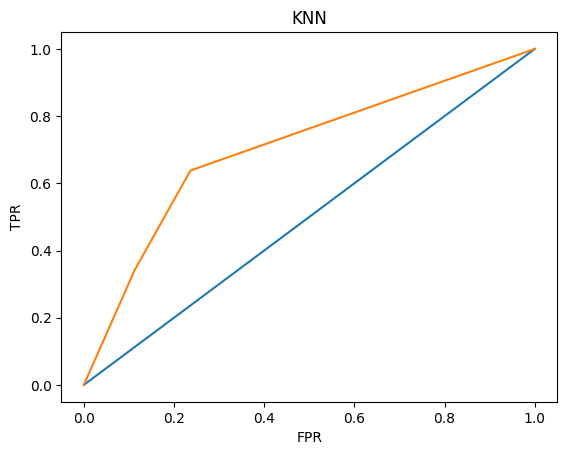

In [12]:
y_pred_proba = KNN.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('KNN')
plt.show()

**AOC score**

In [13]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_proba))

0.7052658877484167


# **Decision Tree**

**Fit model, test against validation set, and run performace metrics**

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

       False       0.93      0.90      0.91      1205
        True       0.36      0.45      0.40       152

    accuracy                           0.85      1357
   macro avg       0.64      0.67      0.66      1357
weighted avg       0.86      0.85      0.86      1357



**ROC curve**

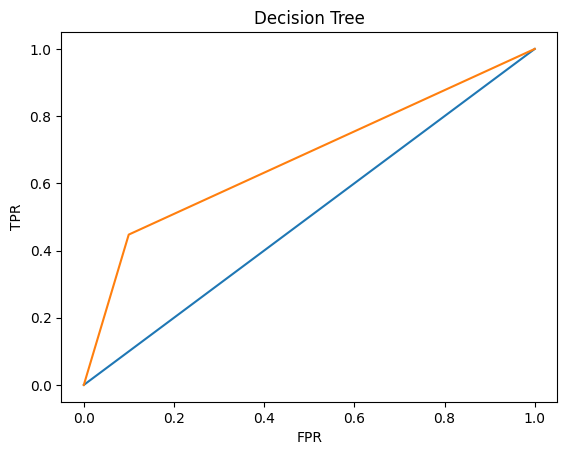

In [15]:
y_pred_proba = dt.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Decision Tree')
plt.show()

**AOC score**

In [16]:
print(roc_auc_score(y_test, y_pred_proba))

0.6738916794059838


# **SVM Classifier**

**Find optimal C value for SVM, then fit and test the model**

In [89]:
# CAUTION, THIS RUNS FOR 3+ HOURS
# This will test different model parameters to find most accurate
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': arange(0.1, 1.1, 0.1),
    'kernel': ['linear']
}

grid = GridSearchCV(SVC(), param_grid, scoring='accuracy', n_jobs=-1, cv=5)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best accuracy (CV):", grid.best_score_)

# Evaluate on test set
best_model = grid.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy:", test_accuracy)


Best params: {'C': 0.5, 'kernel': 'linear'}
Best accuracy (CV): 0.922361359570662
Test accuracy: 0.8894620486366986


**Fit and train model according to hypertuned parameters**

In [90]:
# CAUTION, THIS RUNS FOR 2+ HOURS
#enter parameters from previous cell
from sklearn import svm
model = svm.SVC(kernel='linear', C=.5,probability=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

**Performance metrics**

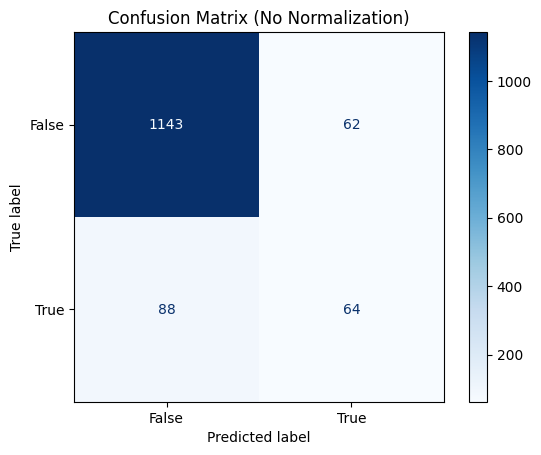

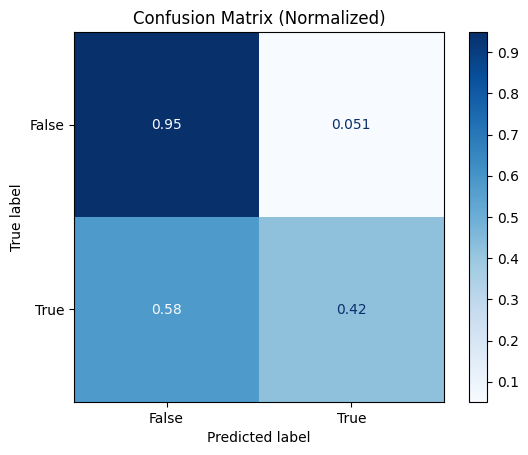

              precision    recall  f1-score   support

       False       0.93      0.95      0.94      1205
        True       0.51      0.42      0.46       152

    accuracy                           0.89      1357
   macro avg       0.72      0.68      0.70      1357
weighted avg       0.88      0.89      0.88      1357



In [91]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Without normalization
ConfusionMatrixDisplay.from_estimator(
    model, 
    X_test, 
    y_test, 
    cmap=plt.cm.Blues
)
plt.title("Confusion Matrix (No Normalization)")
plt.show()

# Normalized
ConfusionMatrixDisplay.from_estimator(
    model, 
    X_test, 
    y_test, 
    cmap=plt.cm.Blues, 
    normalize='true'
)
plt.title("Confusion Matrix (Normalized)")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


**ROC curve**

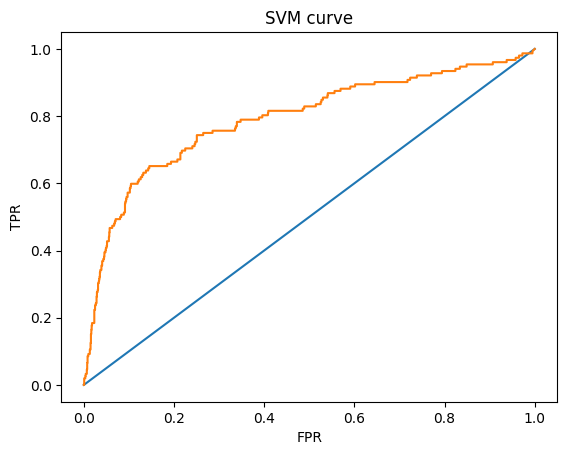

In [92]:
y_pred_proba = model.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='Svm')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('SVM curve')
plt.show()

**AOC score**

In [93]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_proba))

0.7904072941690327


# **Neural Networks**

In [39]:
#!pip install keras-tuner
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing

**Prepare train and test data for NN processing**

In [40]:
# return numpy arrays
X_train_np = X_train.values
X_test_np = X_test1.values

# Get the shape of the ndarray
(n_train_rows, n_train_cols) = X_train.shape
(n_test_rows, n_test_cols) = X_test1.shape

# convert X_train & X_test to float format
X_train_np = X_train_np.reshape(n_train_rows,n_train_cols).astype('float32')
X_test_np = X_test_np.reshape(n_test_rows,n_test_cols).astype('float32')

# normalize data
min_max_scaler = preprocessing.MinMaxScaler()
x_train_scaled = min_max_scaler.fit_transform(X_train_np)
X_train_normalized = pd.DataFrame(x_train_scaled)

min_max_scaler = preprocessing.MinMaxScaler()
x_test_scaled = min_max_scaler.fit_transform(X_test_np)
X_test_normalized = pd.DataFrame(x_test_scaled)

# Convert y labels with one-hot encoding
# Assuming y_train and y_test1 are 1D arrays of integer class labels (0 or 1)
y_train_one_hot = to_categorical(y_train, num_classes=2)
y_test_one_hot = to_categorical(y_test, num_classes=2)

X_train_normalized.shape

(5590, 48)

In [41]:
y_train_one_hot.shape

(5590, 2)

In [42]:
y_test_one_hot.shape

(1357, 2)

**Define a function that accepts hyperparameters like number of neurons, dropout rate, activation, learning rate, etc.**

In [43]:
def build_model(hp):
    model = Sequential()
    
    # First Dense layer with tunable units and activation
    model.add(Dense(
        units=hp.Int('units', min_value=16, max_value=128, step=16),
        activation=hp.Choice('activation', ['relu', 'tanh', 'selu'])
    ))
    
    # Tunable dropout
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.6, step=0.1)))
    
    # Output layer
    model.add(Dense(2, activation='sigmoid'))
    
    # Tunable learning rate for Adam optimizer
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-3, 5e-4, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

**Use the Hyperband tuner for efficient exploration**

In [44]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='my_dir',
    project_name='tune_nn'
)

Reloading Tuner from my_dir/tune_nn/tuner0.json


**Run the search**

In [45]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

tuner.search(
    X_train_normalized, y_train_one_hot,
    epochs=50,
    validation_data=(X_test_normalized, y_test_one_hot),
    callbacks=[stop_early]
)

**Gather best parameters**

In [46]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best number of units: {best_hps.get('units')}
Best activation: {best_hps.get('activation')}
Best dropout: {best_hps.get('dropout')}
Best learning rate: {best_hps.get('learning_rate')}
""")

# Build and train the best model
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    X_train_normalized, y_train_one_hot,
    epochs=50,
    validation_data=(X_test_normalized, y_test_one_hot)
)


Best number of units: 48
Best activation: relu
Best dropout: 0.2
Best learning rate: 0.001

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8063 - loss: 0.4605 - val_accuracy: 0.8769 - val_loss: 0.3537
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9179 - loss: 0.2455 - val_accuracy: 0.8902 - val_loss: 0.2868
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9297 - loss: 0.1964 - val_accuracy: 0.8909 - val_loss: 0.2761
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9336 - loss: 0.1800 - val_accuracy: 0.8909 - val_loss: 0.2699
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9349 - loss: 0.1714 - val_accuracy: 0.8924 - val_loss: 0.2672
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9406 - loss: 0.1580 - val_accuracy: 0.8931 - val_loss: 0.2667
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9424 - loss: 0.1520 - val_accuracy: 0.8961 - val_loss: 0.2666
Epoch 8/50


**Training accuracy vs. testing accuracy**

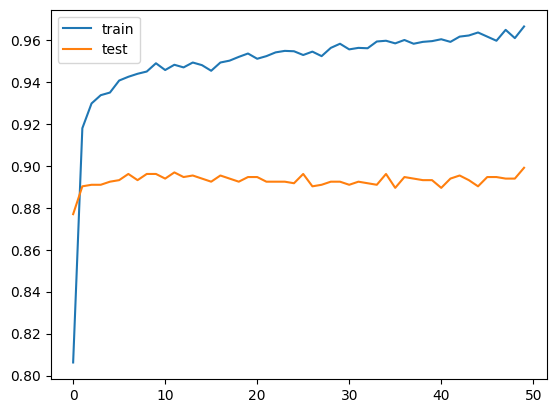

In [47]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [48]:
(loss_score, accuracy_score) = model.evaluate(X_test_normalized,y_test_one_hot,verbose=0)
print(f'Accuracy Score:  {accuracy_score}')
print(f'Loss Score:  {loss_score}')

Accuracy Score:  0.899042010307312
Loss Score:  0.27134639024734497


**Performance matrix**

In [49]:
#!pip install seaborn
from sklearn import metrics
import seaborn as sns
y_pred = model.predict(X_test_normalized)

cf_matrix = metrics.confusion_matrix(y_test_one_hot.argmax(axis=1), y_pred.argmax(axis=1))
print(cf_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test_one_hot.argmax(axis=1), y_pred.argmax(axis=1)))

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[1165   40]
 [  97   55]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1205
           1       0.58      0.36      0.45       152

    accuracy                           0.90      1357
   macro avg       0.75      0.66      0.69      1357
weighted avg       0.88      0.90      0.89      1357



**ROC curve**

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step


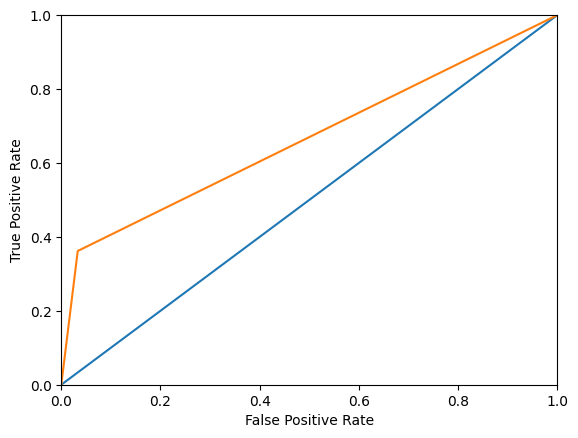

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
y_val_cat_prob = model.predict(X_test_normalized)

# For multiclass, use argmax to get predicted class; for binary, use [:, 1] for positive class probability
fpr, tpr, thresholds = roc_curve(
    y_test_one_hot.argmax(axis=1),
    y_val_cat_prob.argmax(axis=1)
)

def plot_roc_curve(fpr, tpr):
    plt.plot([0, 1], [0, 1])
    plt.plot(fpr, tpr)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

plot_roc_curve(fpr, tpr)

**AOC score**

In [51]:
print(roc_auc_score(y_test_one_hot, model.predict(X_test_normalized)))

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
0.883107665429133
